In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
import IPython.display as ipd
import librosa
import librosa.display
from sklearn.metrics import accuracy_score

In [3]:
!dir

 Volume in drive C is OS
 Volume Serial Number is FCB9-AF4E

 Directory of C:\Users\akram\OneDrive\Desktop\Work\Machine Learning\RNN model

03/28/2023  02:35 PM    <DIR>          .
03/14/2023  03:15 PM    <DIR>          ..
03/27/2023  02:26 PM    <DIR>          .ipynb_checkpoints
03/16/2023  11:12 AM           323,638 2.1-Representation_codage_EER.pdf
03/16/2023  10:58 AM        14,480,704 2.2.2-Traduction-Automatique.pdf
03/16/2023  11:09 AM           852,262 3_1_Encodeur_decodeur.pdf
03/16/2023  11:04 AM         2,368,078 5_2_Parole.pdf
03/27/2023  02:26 PM            78,499 BirdRecognition.ipynb
03/14/2023  03:21 PM         2,061,097 bird_songs_metadata.csv
03/16/2023  10:59 AM         3,895,227 CoursSelfSupSpeech.pdf
03/15/2023  11:28 AM           123,876 CV_2023-02-13_Akram_Chaouache (1) (1).pdf
03/28/2023  02:34 PM           705,064 rnn_model.h5
03/28/2023  02:35 PM           116,092 RNN_model.ipynb
03/14/2023  04:27 PM    <DIR>          saved_models
03/17/2023  10:57 AM         

In [4]:
import pandas as pd
import os
import librosa

metadata=pd.read_csv('bird_songs_metadata.csv')
metadata.head(10)

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav
5,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-8.wav
6,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-9.wav
7,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-11.wav
8,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-14.wav
9,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-15.wav


In [5]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [6]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [7]:
metadata['species'].value_counts()

melodia        1256
polyglottos    1182
cardinalis     1074
migratorius    1017
bewickii        893
Name: species, dtype: int64

In [8]:
audio_file = 'wavfiles/12996-6.wav'
y, sr = librosa.load(audio_file, sr=None)

# Get audio duration in seconds
duration = librosa.get_duration(y=y, sr=sr)

# Calculate number of frames
n_frames = int(sr * duration)

print(n_frames)
#66150

66150


In [9]:
def features_extractor(file):
    n_frames=120
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #++
    frames = np.array_split(mfccs_features.T, n_frames)
    features = np.concatenate(frames, axis=0)
    
    # Compute the mean of each feature across frames
    mean_features = np.mean(features, axis=0)                                
                                    
    
    return mean_features    

In [10]:
!dir

 Volume in drive C is OS
 Volume Serial Number is FCB9-AF4E

 Directory of C:\Users\akram\OneDrive\Desktop\Work\Machine Learning\RNN model

03/28/2023  02:35 PM    <DIR>          .
03/14/2023  03:15 PM    <DIR>          ..
03/27/2023  02:26 PM    <DIR>          .ipynb_checkpoints
03/16/2023  11:12 AM           323,638 2.1-Representation_codage_EER.pdf
03/16/2023  10:58 AM        14,480,704 2.2.2-Traduction-Automatique.pdf
03/16/2023  11:09 AM           852,262 3_1_Encodeur_decodeur.pdf
03/16/2023  11:04 AM         2,368,078 5_2_Parole.pdf
03/27/2023  02:26 PM            78,499 BirdRecognition.ipynb
03/14/2023  03:21 PM         2,061,097 bird_songs_metadata.csv
03/16/2023  10:59 AM         3,895,227 CoursSelfSupSpeech.pdf
03/15/2023  11:28 AM           123,876 CV_2023-02-13_Akram_Chaouache (1) (1).pdf
03/28/2023  02:34 PM           705,064 rnn_model.h5
03/28/2023  02:35 PM           116,092 RNN_model.ipynb
03/14/2023  04:27 PM    <DIR>          saved_models
03/17/2023  10:57 AM         

In [11]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath('wavfiles/'),row["filename"])                        
    final_class_labels=row["species"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

5422it [00:49, 108.76it/s]


In [12]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-132.85225, 81.1399, 17.018225, 54.974297, -1...",bewickii
1,"[-147.74393, 99.42544, 20.885643, 44.118813, 1...",bewickii
2,"[-92.42778, 84.10635, 17.362778, 53.86046, -8....",bewickii
3,"[-93.07557, 81.17431, 16.225544, 52.08842, -8....",bewickii
4,"[-107.95914, 92.416, 17.773254, 43.13245, -1.8...",bewickii


In [13]:
### Split the dataset into independent and dependent dataset
X = np.array([f[0] for f in extracted_features])
y = np.array([f[1] for f in extracted_features])


In [14]:
X.shape

(5422, 40)

In [15]:
print(y)

['bewickii' 'bewickii' 'bewickii' ... 'cardinalis' 'cardinalis'
 'cardinalis']


In [16]:
# Reshape X to have a time dimension
n_frames = 120  # Replace this with the actual number of frames per audio clip
#X = X.reshape(X.shape[0], n_frames, X.shape[1])

# Convert y to one-hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = y.reshape(-1, 1)
enc = OneHotEncoder()
y = enc.fit_transform(y).toarray()


In [17]:
print(y)
print(y.shape)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
(5422, 5)


In [18]:
#from tensorflow.keras.utils import to_categorical
#from sklearn.preprocessing import LabelEncoder
#labelencoder=LabelEncoder()
#y=to_categorical(labelencoder.fit_transform(y))

In [19]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape

(4337, 40)

In [20]:
import tensorflow as tf
print(tf.__version__)

2.10.1


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow.keras as keras
from sklearn import metrics
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [90]:
test_labels = y_test[1]
test_labels.shape

(5,)

In [23]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, input_shape=(shape1, shape2), return_sequences=True))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(5, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 54,405
Trainable params: 54,405
Non-trainable params: 0
_________________________________________________________________


In [25]:
X_train = np.resize(X_train, (4337, 40, 1))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [26]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

Epoch 1/60
133/136 [============================>.] - ETA: 0s - loss: 1.5867 - accuracy: 0.2578
Epoch 1: val_loss improved from inf to 1.56424, saving model to saved_models\audio_classification.hdf5
136/136 [==============================] - 8s 21ms/step - loss: 1.5868 - accuracy: 0.2576 - val_loss: 1.5642 - val_accuracy: 0.2747
Epoch 2/60
136/136 [==============================] - ETA: 0s - loss: 1.5377 - accuracy: 0.3180
Epoch 2: val_loss improved from 1.56424 to 1.50786, saving model to saved_models\audio_classification.hdf5
136/136 [==============================] - 2s 16ms/step - loss: 1.5377 - accuracy: 0.3180 - val_loss: 1.5079 - val_accuracy: 0.3281
Epoch 3/60
134/136 [============================>.] - ETA: 0s - loss: 1.4741 - accuracy: 0.3589
Epoch 3: val_loss improved from 1.50786 to 1.40717, saving model to saved_models\audio_classification.hdf5
136/136 [==============================] - 2s 15ms/step - loss: 1.4745 - accuracy: 0.3585 - val_loss: 1.4072 - val_accuracy: 0.3816

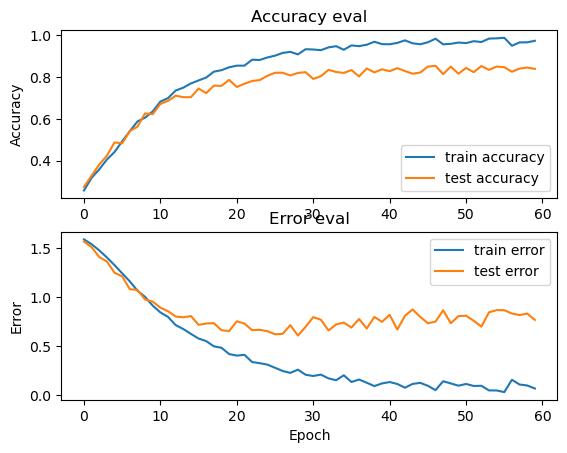

Training completed in time:  0:02:13.651012


In [27]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 


num_epochs = 60
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history =model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
plot_history(history)

duration = datetime.now() - start
print("Training completed in time: ", duration)

In [42]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [44]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8396313190460205


In [58]:
print(len(X_test))

1085


In [45]:
MODEL_NAME = "RNN_model.h5"
model.save(MODEL_NAME)

In [46]:
convert_bytes(get_file_size(MODEL_NAME), "MB")

File size: 0.672 Megabytes


In [47]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [55]:
from tensorflow import lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
tf.lite.OpsSet.SELECT_TF_OPS]

In [52]:
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\akram\AppData\Local\Temp\tmpl7hsadus\assets


INFO:tensorflow:Assets written to: C:\Users\akram\AppData\Local\Temp\tmpl7hsadus\assets


In [50]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

76328

In [36]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

File size: 74.539 Kilobytes


In [56]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 40  1]
Input Type: <class 'numpy.float32'>
Output Shape: [1 5]
Output Type: <class 'numpy.float32'>


In [59]:
interpreter.resize_tensor_input(input_details[0]['index'], (len(X_test), 40, 1))
interpreter.resize_tensor_input(output_details[0]['index'], (len(X_test), 5))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [1085   40    1]
Input Type: <class 'numpy.float32'>
Output Shape: [1085    5]
Output Type: <class 'numpy.float32'>


In [76]:
test_numpy = np.array(X_test, dtype=np.float32)

In [77]:
test_numpy.shape

(1085, 40)

In [78]:
test_numpy = np.expand_dims(test_numpy, axis=-1)
test_numpy.shape

(1085, 40, 1)

In [99]:
interpreter.set_tensor(input_details[0]['index'], test_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)
print(tflite_model_predictions.shape)


Prediction results shape: (1085, 5)
(1085, 5)


In [104]:
print('prediction_classes shape:', prediction_classes.shape)
print('y_test shape:', y_test.shape)
test_labels = np.argmax(y_test, axis=1)
print(test_labels)

prediction_classes shape: (1085,)
y_test shape: (1085, 5)
[1 3 3 ... 2 3 1]


In [106]:
acc = accuracy_score(prediction_classes, test_labels)
print(acc)

0.8387096774193549
